# Determining Feature Importance

### Import relevant packages and read in the dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Read in the data
df = pd.read_csv('../clean_dataset.csv')

y = df.iloc[:,0:7]
X = df.iloc[:,7:]

### Fit a forest and determine feature importances

In [15]:
# Build and fit a random forest classifier
forest = ExtraTreesClassifier(n_estimators=100, random_state=12)
forest.fit(X, y)

# Get feature importances from the tree classifier
importances = forest.feature_importances_

# Determine error bars for importances
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

### Print out results

Feature ranking:
Feature 5: Slightly dissatisfied (0.082524)
Feature 1: Extremely satisfied (0.075929)
Feature 0: Extremely dissatisfied (0.070871)
Feature 3: Moderately satisfied (0.070357)
Feature 6: Slightly satisfied (0.063486)
Feature 8: Angular (0.062008)
Feature 2: Moderately dissatisfied (0.055843)
Feature 9: Cordova (0.047023)
Feature 11: Hadoop (0.045898)
Feature 4: Neither satisfied nor dissatisfied (0.040268)
Feature 7: .NET Core (0.035251)
Feature 29: StackOverflowHasAccount_No (0.029365)
Feature 23: NumberMonitors_1 (0.025637)
Feature 32: HoursComputer_5 - 8 hours (0.025252)
Feature 25: NumberMonitors_3 (0.025065)
Feature 26: NumberMonitors_4 (0.024727)
Feature 31: HoursComputer_1 - 4 hours (0.024266)
Feature 22: OperatingSystem_Windows (0.022403)
Feature 30: StackOverflowHasAccount_Yes (0.020820)
Feature 10: Django (0.017658)
Feature 21: OperatingSystem_MacOS (0.016986)
Feature 28: StackOverflowHasAccount_I'm not sure / I can't remember (0.015461)
Feature 13: React (0.01

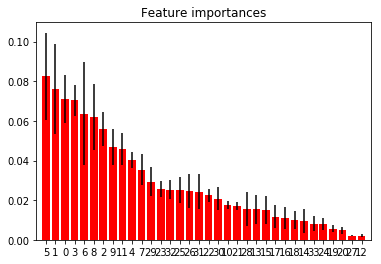

In [18]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("Feature %d: %s (%f)" % (indices[f], df.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()